In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from api_key import api_key

In [2]:
params = {
  'start':'1',
  'limit':'10',
  'convert':'USD'}

headers= {"X-CMC_PRO_API_KEY":api_key, "Accepts":"application/json"}

url= "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

In [3]:
response= requests.get(url, headers=headers, params=params)
json=response.json()
json=json['data']

In [4]:
tags=[]
prices=[]
for currency in json:
    tag= currency['symbol']
    tags.append(tag)
    price= currency['quote']['USD']['price']
    prices.append(price)

In [5]:
tags

['BTC', 'ETH', 'BNB', 'SOL', 'USDT', 'ADA', 'XRP', 'DOT', 'DOGE', 'USDC']

In [6]:
prices

[62173.77614456425,
 4603.757502950735,
 664.4411231718617,
 252.01245999802353,
 1.00083942140655,
 1.99396881629777,
 1.17408313589926,
 53.14569743155084,
 0.26355901902045,
 1.00011134756214]

In [7]:
price_data=pd.DataFrame(list(zip(tags,prices)), columns=['Currency','Price' ])

In [8]:
price_data

,Currency,Price
0,BTC,62173.776145
1,ETH,4603.757503
2,BNB,664.441123
3,SOL,252.012460
4,USDT,1.000839
5,ADA,1.993969
6,XRP,1.174083
7,DOT,53.145697
8,DOGE,0.263559
9,USDC,1.000111


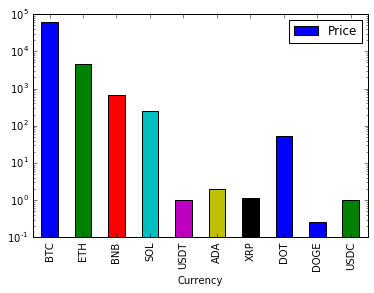

In [9]:
%matplotlib inline
price_data.plot.bar(x="Currency", y="Price", logy=True)